In [1]:
!pip install numpy pandas simpleitk matplotlib 

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!source setup.sh

8500
1.13.0+cu117
Defaulting to user installation because normal site-packages is not writeable
Obtaining file:///sfs/qumulo/qhome/zce5py/Desktop/nnUNet
  Attempting uninstall: nnunet
    Found existing installation: nnunet 1.7.0
    Uninstalling nnunet-1.7.0:
      Successfully uninstalled nnunet-1.7.0
  Running setup.py develop for nnunet
Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/FabianIsensee/hiddenlayer.git (to revision more_plotted_details) to /tmp/pip-install-7ok90fnd/hiddenlayer
  Created wheel for hiddenlayer: filename=hiddenlayer-0.2-py3-none-any.whl size=19811 sha256=eb674a391af7d3afdeb5fdfaf101a8ad0a26661846a338b9a4671621c509b4e2
  Stored in directory: /tmp/pip-ephem-wheel-cache-ehwpcwu1/wheels/ba/64/4b/a960398ddff6d8fdbd45a3daa618eacc7806502eae6b32407f
Successfully built hiddenlayer
  Attempting uninstall: hiddenlayer
    Found existing installation: hiddenlayer 0.2
    Uninstalling hiddenlayer-0.2:
      Succ



Please cite the following paper when using nnUNet:

Isensee, F., Jaeger, P.F., Kohl, S.A.A. et al. "nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation." Nat Methods (2020). https://doi.org/10.1038/s41592-020-01008-z


If you have questions or suggestions, feel free to open an issue at https://github.com/MIC-DKFZ/nnUNet

nnUNet_raw_data_base is not defined and nnU-Net can only be used on data for which preprocessed files are already present on your system. nnU-Net cannot be used for experiment planning and preprocessing like this. If this is not intended, please read documentation/setting_up_paths.md for information on how to set this up properly.
nnUNet_preprocessed is not defined and nnU-Net can not be used for preprocessing or training. If this is not intended, please read documentation/setting_up_paths.md for information on how to set this up.
RESULTS_FOLDER is not defined and nnU-Net cannot be used for training or inference. If this is not in

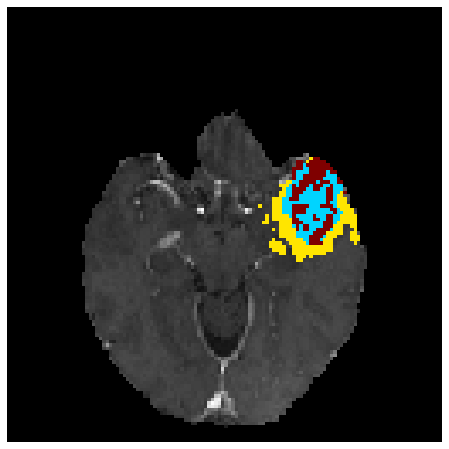

In [5]:
import SimpleITK as sitk
import matplotlib.pylab as plt
import os
import pandas as pd
import numpy as np
from nnunet.evaluation.evaluator import *
from nnunet.evaluation.region_based_evaluation import *
from nnunet.dataset_conversion.Task082_BraTS_2020 import * 

TASK_NAME = 'Task500_BrainTumor'

TRAIN_IMAGES = f'nnUNet_raw_data_base/nnUNet_raw_data/{TASK_NAME}/imagesTr'
TRAIN_LABELS = f'nnUNet_raw_data_base/nnUNet_raw_data/{TASK_NAME}/labelsTr'
TEST_IMAGES = f'nnUNet_raw_data_base/nnUNet_raw_data/{TASK_NAME}/imagesTs'
TEST_LABELS = f'nnUNet_raw_data_base/nnUNet_raw_data/{TASK_NAME}/labelsTs'

train_ids = [int(fpath.split('_')[1].split('.')[0]) for fpath in os.listdir(TRAIN_IMAGES) if fpath.endswith('.nii.gz')]
train_ids.sort()

test_ids = [int(fpath.split('_')[1].split('.')[0]) for fpath in os.listdir(TEST_IMAGES) if fpath.endswith('.nii.gz')]
test_ids.sort()

print(len(train_ids), 'train', len(test_ids), 'test') 
print('file_id examples:', train_ids[:30])

id = 0 # set this to the image/subject ID

def visualize(image, label):
    plt.figure(figsize=(8,8))
    plt.imshow(image, cmap='gray')

    alpha = label.copy()
    alpha[alpha>0] = 1
    plt.imshow(label, alpha=alpha, cmap='jet')
    plt.axis('off')
    plt.show()
    
    
image = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(TRAIN_IMAGES, f"BRATS_{str(id).zfill(5)}_0000.nii.gz"), sitk.sitkFloat32)).squeeze()
label = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(TRAIN_LABELS, f"BRATS_{str(id).zfill(5)}.nii.gz"), sitk.sitkFloat32)).squeeze()

print(image.shape, label.shape)

visualize(image, label)

### Metrics

In [6]:
REF_PATH = f"nnUNet_raw_data_base/nnUNet_raw_data/{TASK_NAME}/labelsTs"
PRED_PATH_MAIN = f"nnUNet_raw_data_base/nnUNet_raw_data/{TASK_NAME}/predTs"

df_list = []

print('\n=========================\nTEST SET')

TRAINER_CLASS = "nnUNetTrainerV2BraTSRegions_DA4_BN_BD"

PRED_PATH = f'{PRED_PATH_MAIN}_{TRAINER_CLASS}'

evaluate_BraTS_folder(PRED_PATH, REF_PATH)

test_summary_df = pd.read_csv(f'{PRED_PATH}/results.csv')

PRED_PATH_MAIN = f"nnUNet_raw_data_base/nnUNet_raw_data/{TASK_NAME}/predTs"
PRED_LABELS = PRED_PATH

print('\n==================\nUSING PRED_LABELS=', PRED_LABELS)
final_metrics_table = pd.DataFrame([test_summary_df.mean(axis=0), test_summary_df.std(axis=0), test_summary_df.median(axis=0), test_summary_df.quantile(axis=0, q=0.25), test_summary_df.quantile(axis=0, q=0.75)], index=['mean', 'std', 'median', '25th', '75th']) 
final_metrics_table


TEST SET

USING PRED_LABELS= nnUNet_raw_data_base/nnUNet_raw_data/Task500_BrainTumor/predTs_nnUNetTrainerV2BraTSRegions_DA4_BN_BD


,dc_whole,dc_core,dc_enh,hd95_whole,hd95_core,hd95_enh
mean,0.658727,0.628755,0.819321,70.979584,71.192713,29.887745
std,0.361064,0.348218,0.277628,142.587795,142.488040,98.829734
median,0.840100,0.779300,0.894400,2.828000,3.162000,1.000000
25th,0.472875,0.457700,0.789150,1.000000,1.000000,0.000000
75th,0.903400,0.864075,1.000000,11.482500,11.782500,2.000000


### Test Set Predictions - Visualize

32088


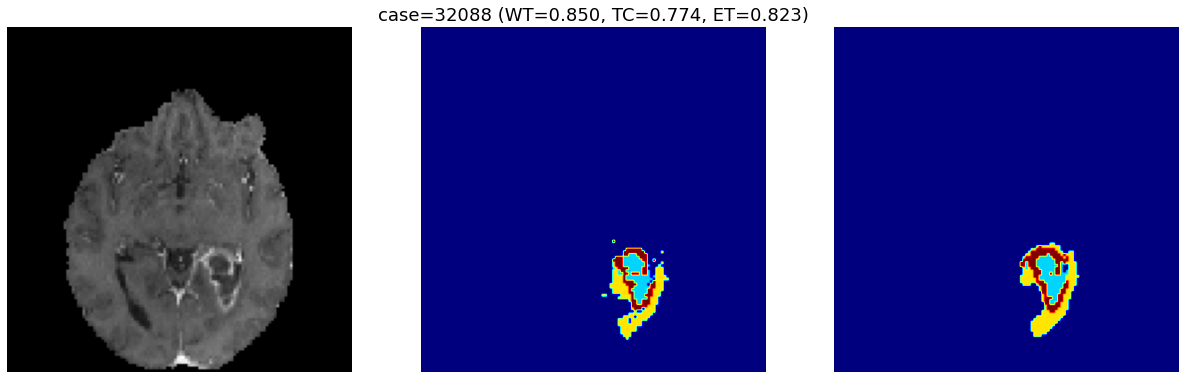

32256


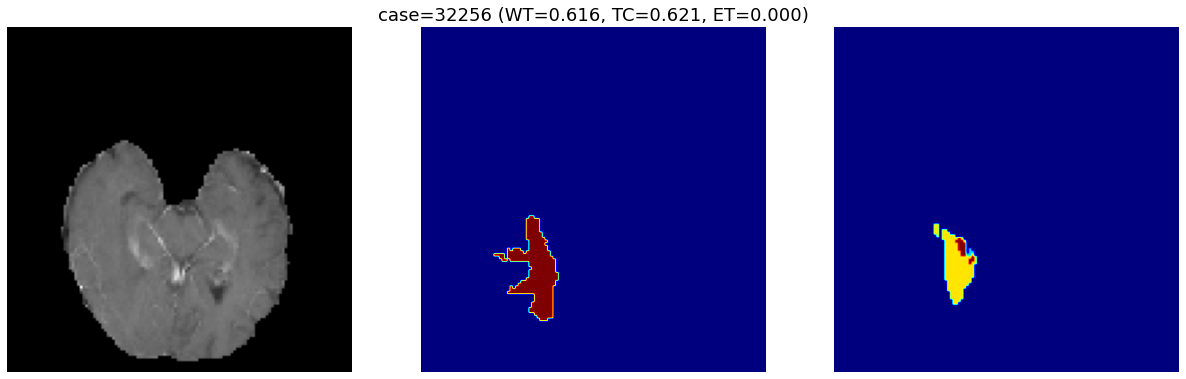

32424


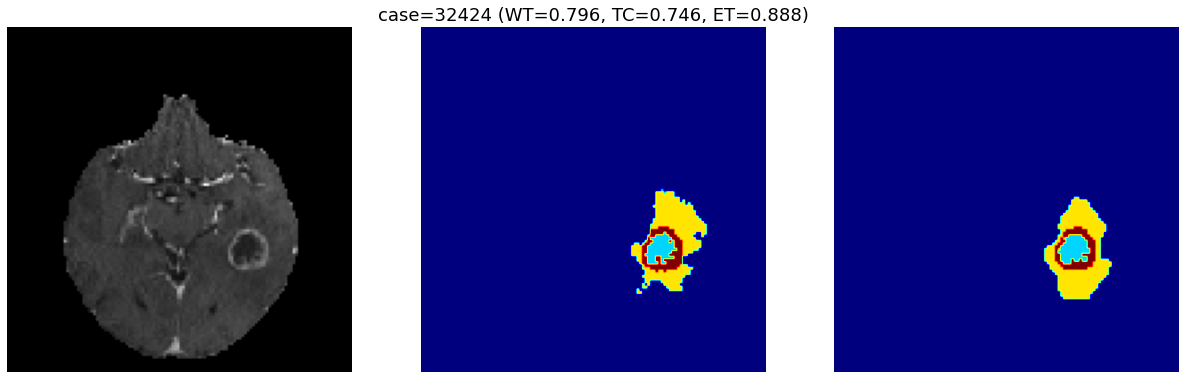

32592


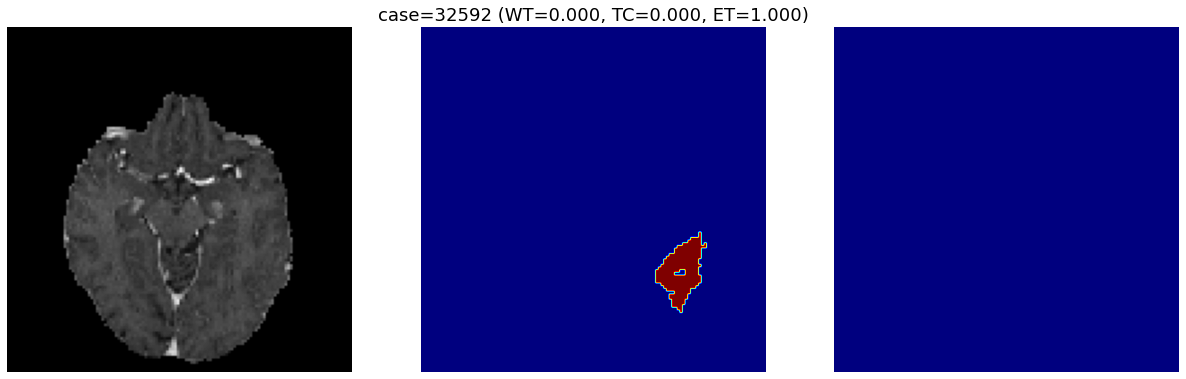

32760


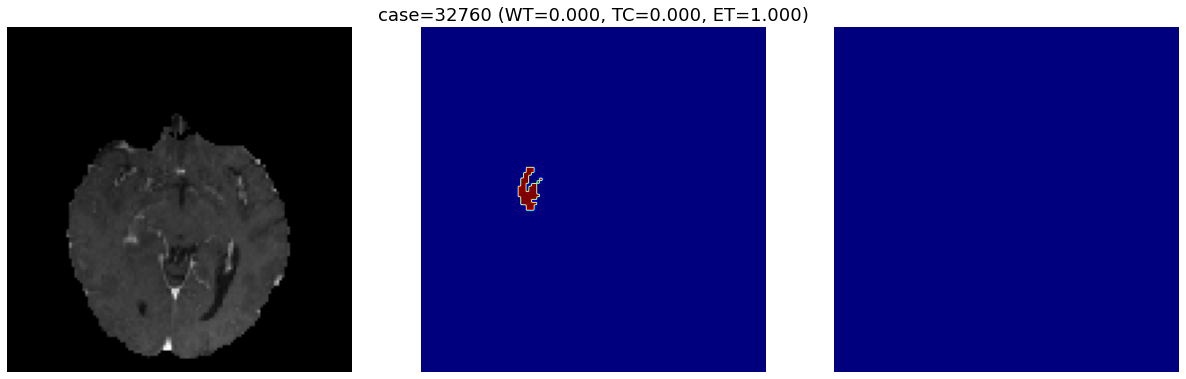

32928


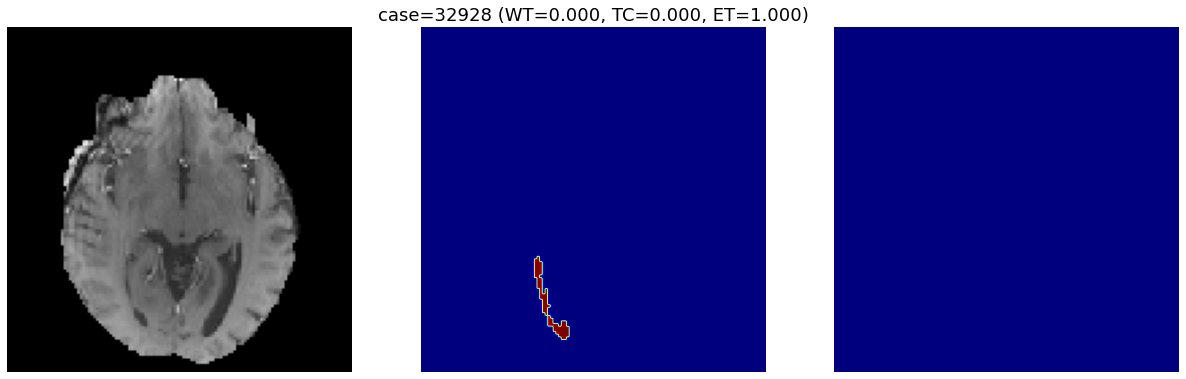

33096


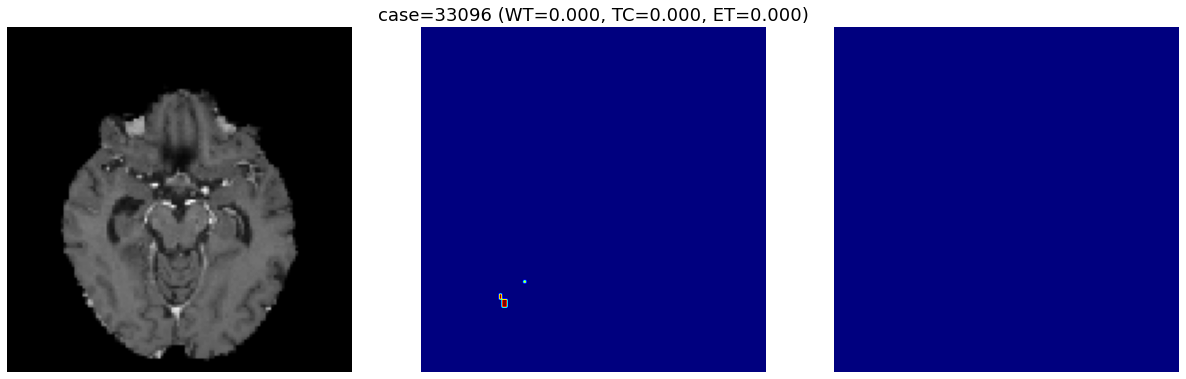

33264


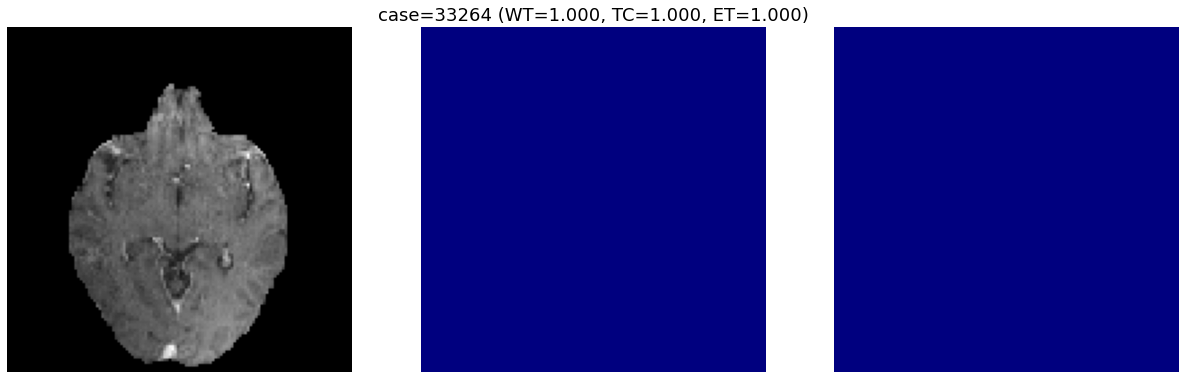

33432


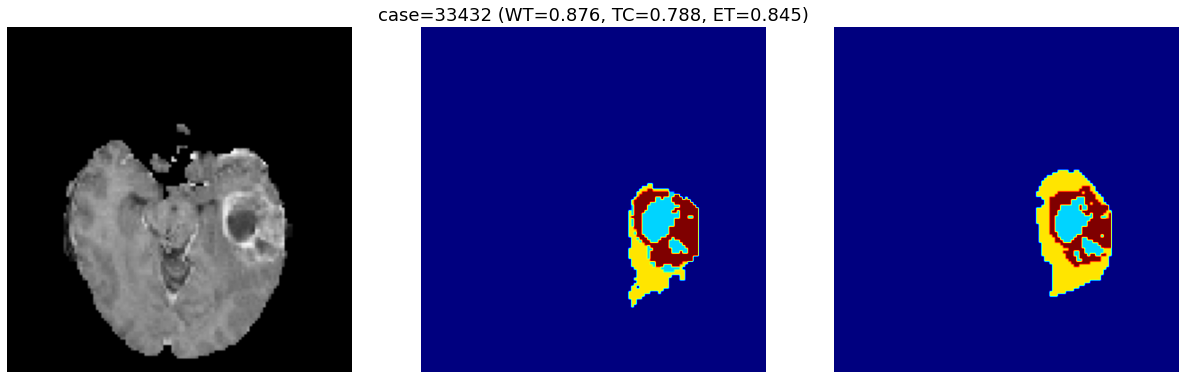

33600


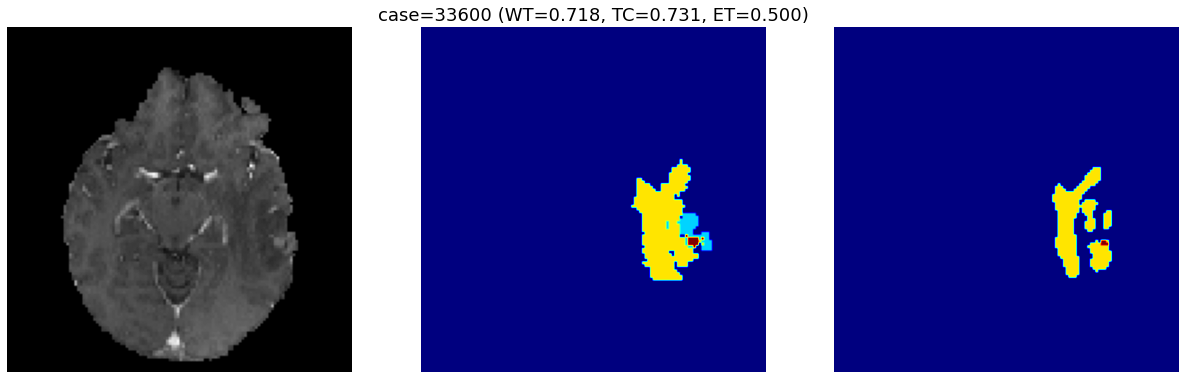

33768


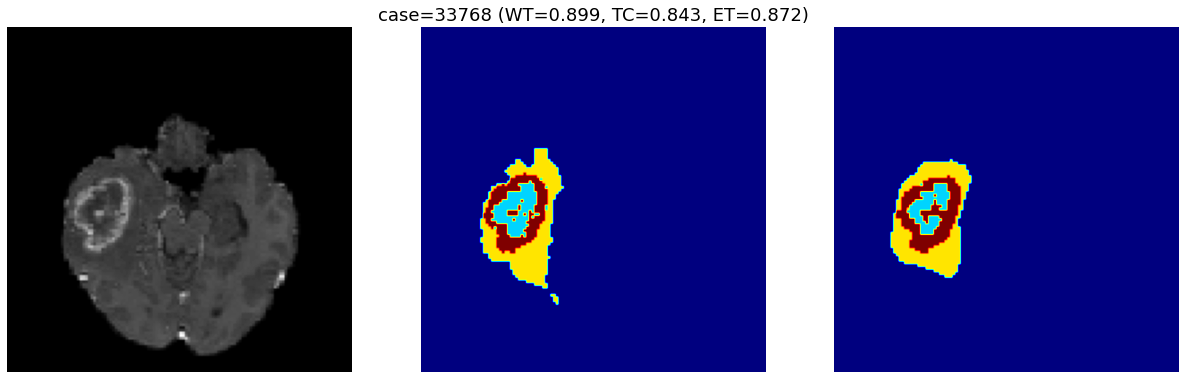

33936


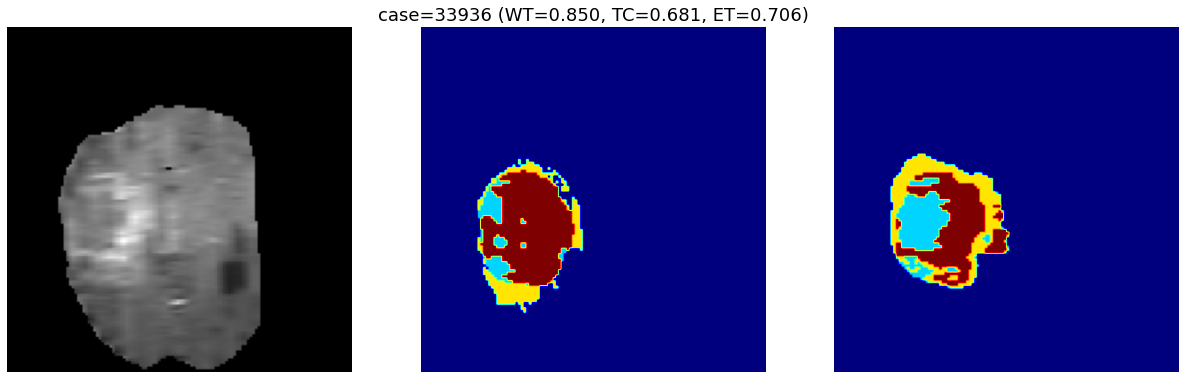

34104


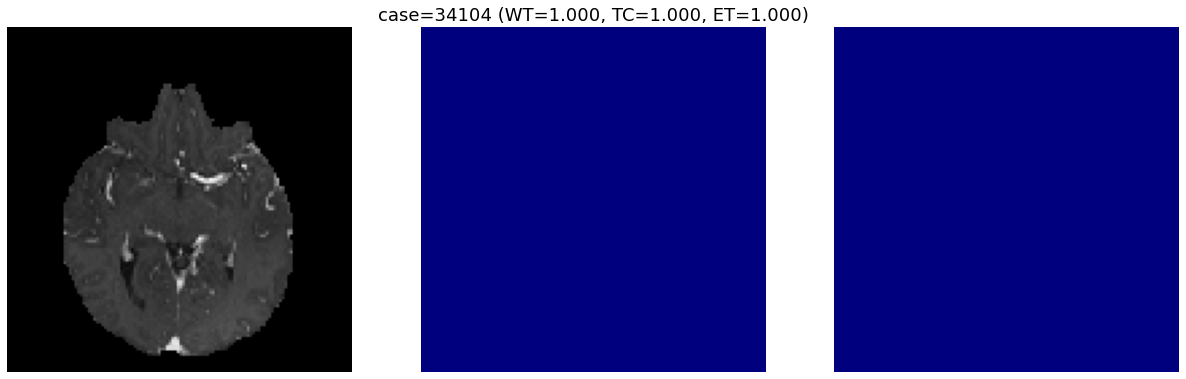

34272


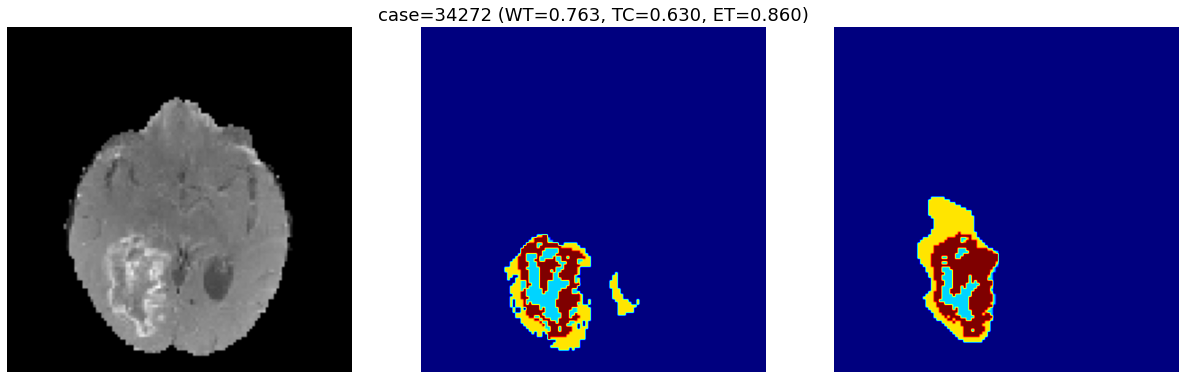

34440


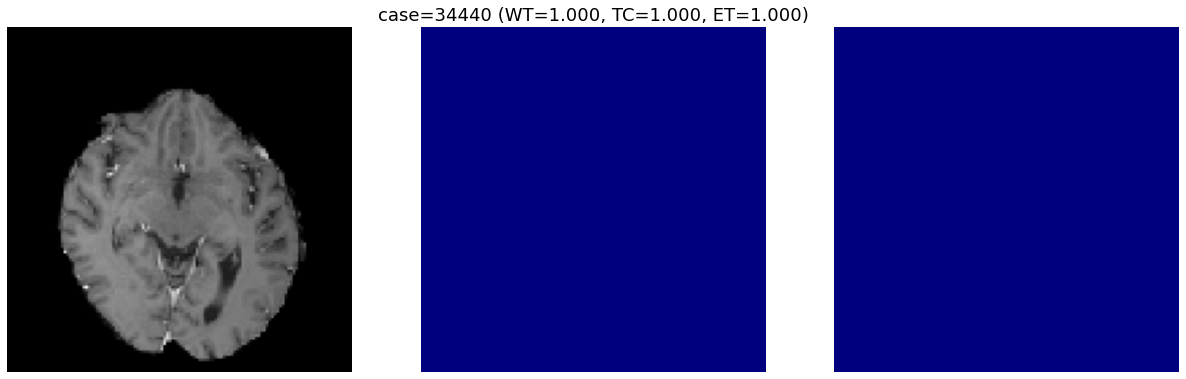

34608


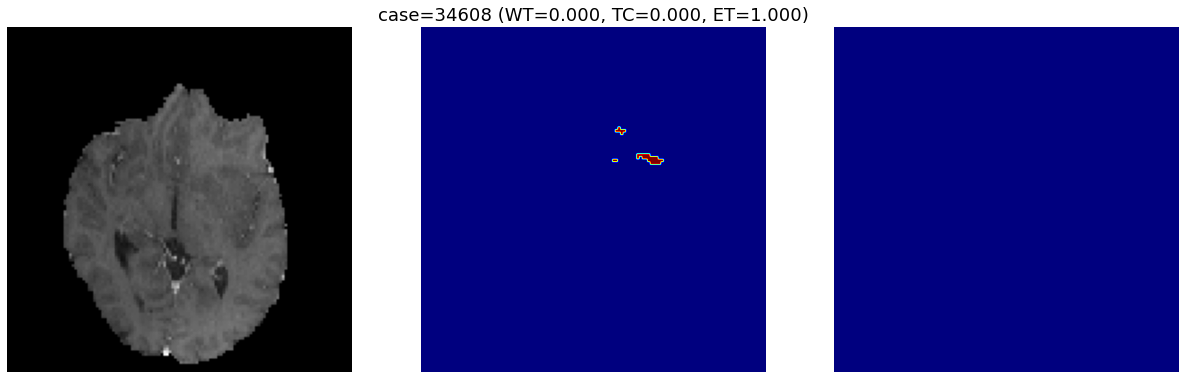

34776


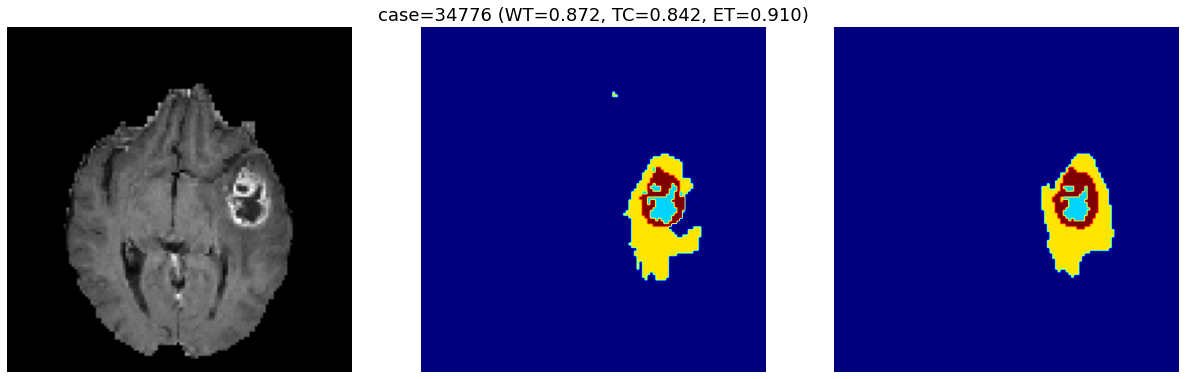

34944


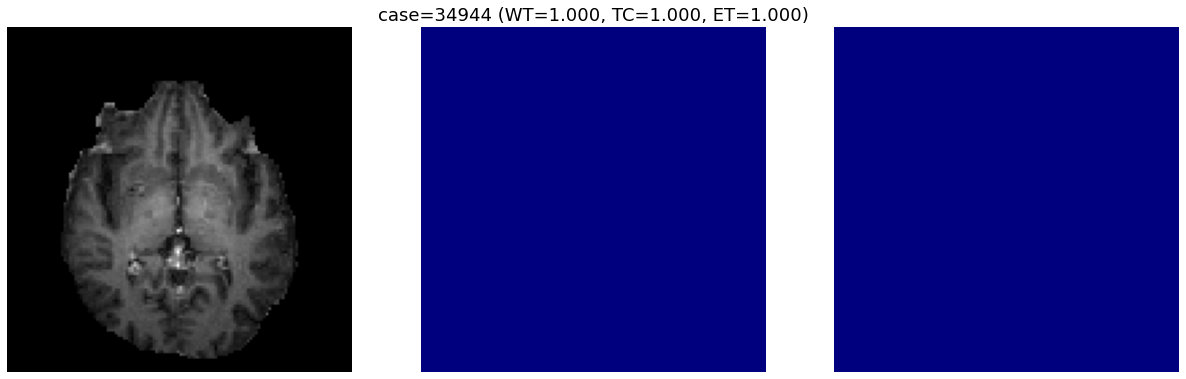

35112


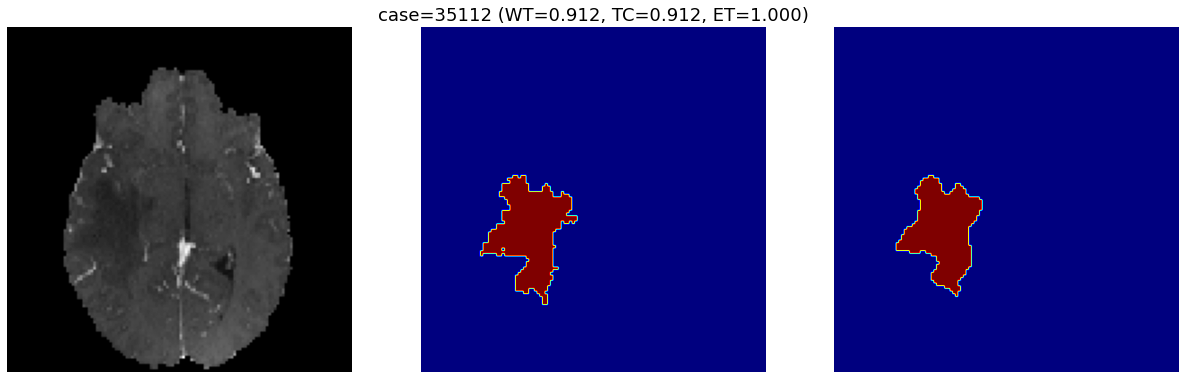

In [7]:
def visualize_side(image, label, pred_label, title=''):
    plt.figure(figsize=(21,7))
    
    plt.subplot(1,3,1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1,3,2)
    plt.imshow(label, cmap='jet')
    plt.axis('off')
    plt.title(title, fontsize=18)
    
    plt.subplot(1,3,3)
    plt.imshow(pred_label, cmap='jet')
    plt.axis('off')
    
    plt.show()
    
    
    
for i in range(0, len(test_ids), 20):
    id = test_ids[i]
    print(id)
    
    fill_id = str(id).zfill(5)
    
    image = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(TEST_IMAGES, f"BRATS_{fill_id}_0000.nii.gz"), sitk.sitkFloat32)).squeeze()
    label = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(TEST_LABELS, f"BRATS_{fill_id}.nii.gz"), sitk.sitkFloat32)).squeeze()
    pred_label = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(PRED_LABELS, f"BRATS_{fill_id}.nii.gz"), sitk.sitkFloat32)).squeeze()
    
    metrics = test_summary_df[test_summary_df['name']==f'BRATS_{fill_id}.nii.gz']
    m = metrics.values[0][1:].astype(np.float32)
#     m[np.isnan(m)] = 1
    title = f'case={id} (dc_WT={m[0]:.3f}, dc_TC={m[1]:.3f}, dc_ET={m[2]:.3f}, hd95_WT={m[0]:.3f}, hd95_TC={m[1]:.3f}, hd95_ET={m[2]:.3f})'
    title = f'case={id} (WT={m[0]:.3f}, TC={m[1]:.3f}, ET={m[2]:.3f})'

    visualize_side(image, label, pred_label, title)